# Device Price Classification using Machine Learning

This project aims to build a predictive model to classify mobile device prices into different ranges based on various features such as battery power, RAM, and screen resolution. The classification will help sellers in the market to categorize devices accurately.

**Author:** Abdalelah Taleb


--------------------------------------------------------------------

### Importing Necessary Libraries

In this section, we import all the necessary Python libraries that will be used for data manipulation, visualization, model training, and evaluation.

- **pandas**: For handling and analyzing structured data.
- **matplotlib & seaborn**: For creating visualizations to explore data insights.
- **scikit-learn**: For machine learning models, data preprocessing, and evaluation metrics.
- **numpy**: For numerical operations and array handling.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
import numpy as np
from joblib import dump

In [73]:

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Set the path to the data
TRAIN_PATH = '../data/train.csv'
TEST_PATH = '../data/test.csv'

# Set random seed
RANDOM_STATE = 1999

In [74]:
train_df = pd.read_csv(TRAIN_PATH)
test_df=pd.read_csv(TEST_PATH)
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


### Training Data Overview
- **First few rows**: The data includes various features like battery power, whether the device has Bluetooth (`blue`), the clock speed, and many others, alongside the target variable `price_range`.

In [75]:
train_df.shape

(2000, 21)

- **Shape**: As seen from the above output, the train data has `2000` rows and `21` columns (including the target variable).

In [76]:
# Check the statistical description of the training data
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,1995.000000,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,9.915789,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,6.058469,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Statistics, Missing Values, and Basic Information
- **Descriptive Statistics**: The dataset covers a wide range of values for each feature, suggesting varied types of devices. For example, `battery_power` ranges from 501 to 1998 mAh.

In [77]:
# Check for missing values in the training data
train_df.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- **Missing Data**: A few columns have missing data, but the number is relatively small. For instance, `fc` (front camera megapixels) and `four_g` have 5 missing entries each.

In [78]:
# Check the information of the training data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- **Basic Information**: Interestingly, all the features are numerical, either integers or floats. This is very good.

### Exploratory Data Analysis (EDA)

In [79]:
# Imputing missing values
imputer = SimpleImputer(strategy='mean')
train_df_imputed = pd.DataFrame(imputer.fit_transform(train_df), columns=train_df.columns)

# Re-check for missing values after imputation
train_df_imputed.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We've successfully imputed the missing values in the dataset, ensuring that all features are complete and ready for further analysis and modeling. There are no missing values remaining.

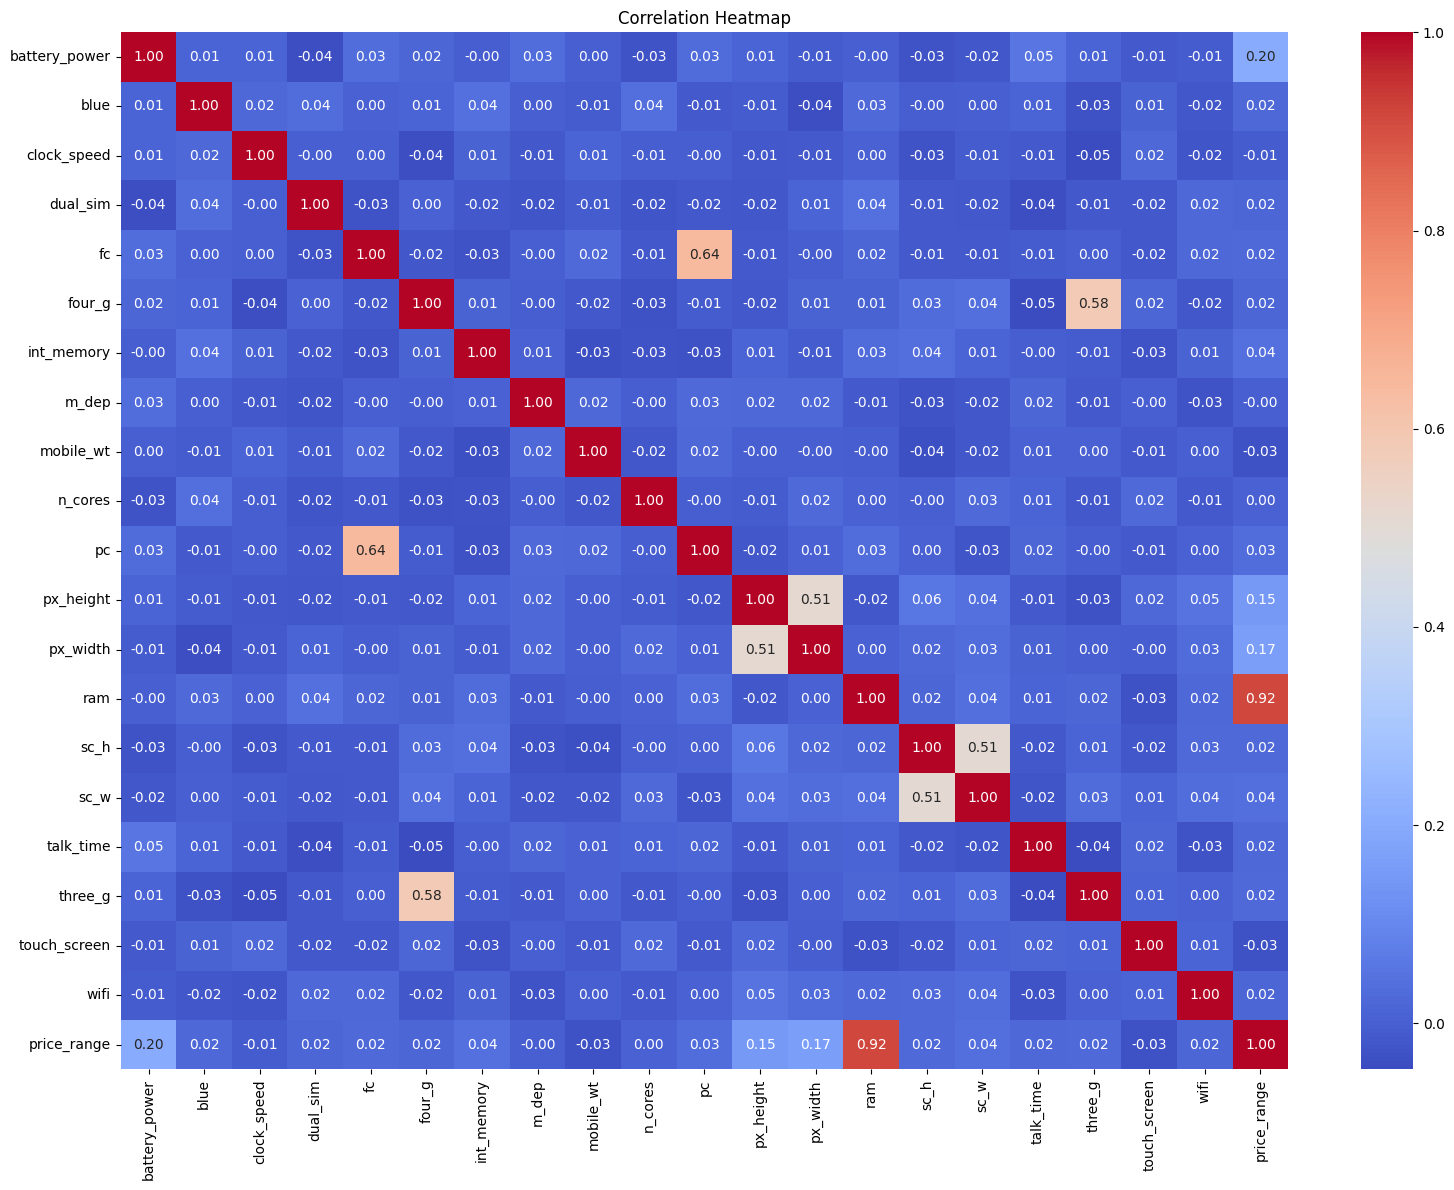

In [80]:
# Correlation heatmap using seaborn for visualizing correlations between features and the target
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(train_df_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### Observations from the Correlation Heatmap:
- **Positive Insights**: 
  - `ram` has a very strong positive correlation (0.92) with `price_range`, making it a key feature for price prediction.
  - Screen resolution features (`px_width` and `px_height`) show a moderate positive correlation with price, indicating that higher screen resolution tends to increase the price.
  - `battery_power` has a small positive correlation with price, suggesting a minor impact.

- **Negative Insights**:
  - Features like `blue`, `dual_sim`, and `touch_screen` have very weak or no correlation with `price_range`, indicating they may not contribute significantly to the prediction model.
  - High correlation between some non-target features (e.g., `fc` and `pc`, `three_g` and `four_g`) could introduce redundancy, potentially affecting model performance if not addressed.


- - - - - - - - - - - - - - - -

### Model Selection Strategy:
   - Based on the insights gleaned from the correlation analysis and the nature of the dataset, I have identified several models that are well-suited for this classification task:

     - **Decision Tree Classifier**: A simple and interpretable model that works well with categorical data and non-linear relationships. However, it's prone to overfitting, especially with deeper trees. I used this as a baseline model for comparison.

     - **Random Forest Classifier**: This ensemble method aggregates multiple decision trees to improve prediction accuracy and mitigate overfitting. It works well with both categorical and numerical data and captures complex relationships within the features, making it a strong candidate for our dataset.

     - **Naive Bayes**: A probabilistic model based on Bayes' theorem, assuming feature independence. While this assumption might not always hold, Naive Bayes can be computationally efficient and works well with certain types of data distributions, making it useful as a quick and interpretable model.

     - **Support Vector Machine (SVM)**: Particularly effective in high-dimensional spaces, SVM can handle non-linear decision boundaries by using different kernel functions. This model is suitable when there are complex relationships in the data that might not be easily captured by simpler models.

     - **K-Nearest Neighbors (KNN)**: A simple, non-parametric algorithm that classifies data points based on their proximity to neighbors. While effective for smaller datasets, KNN can become computationally expensive with larger datasets, and its performance can degrade with noisy data.

   


- - - - - - 

### Model Evaluation Function

This function `evaluate_model()` takes a trained machine learning model and test data as inputs to evaluate the model's performance. It calculates several important metrics including accuracy, precision, recall, F1-score, and Cohen's kappa score. Additionally, it generates a confusion matrix to visualize the model's performance in classifying the test data. The metrics provide insights into how well the model is performing, and the confusion matrix gives a detailed breakdown of the correct and incorrect classifications.

Key steps:
- **Accuracy**: Proportion of correctly predicted instances out of the total instances.
- **Precision**: The proportion of true positive predictions out of all positive predictions.
- **Recall**: The proportion of actual positives that were correctly identified by the model.
- **F1-score**: The harmonic mean of precision and recall, useful when you need a balance between the two.
- **Cohen's kappa score**: Measures the level of agreement between the predicted and actual values, accounting for chance agreement.
- **Confusion matrix**: A matrix to display the performance of the classification model by showing the counts of actual vs predicted labels.


In [81]:
def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    kappa = cohen_kappa_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Cohen's kappa score:", kappa)

    # Calculate and display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall,
            'f1': f1, 'kappa': kappa, 'cm': cm}

In [82]:
# Select only the important features based on the correlation analysis
important_features = ['ram', 'px_width', 'px_height', 'battery_power']

# Define X and y based on the important features only
X_important = train_df_imputed[important_features]
y = train_df_imputed['price_range']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.2, random_state=42)

## Model Training and Accuracy Evaluation

In this section, we will train various machine learning models on the selected important features of the dataset. The goal is to evaluate their performance in predicting the price range of mobile devices. Each model will be trained using the training set and validated using the validation set. After training, we will print the accuracy of each model to compare their performance.


Accuracy: 0.8725
Precision: 0.8764100915087168
Recall: 0.8725
F1-score: 0.8732929337956018
Cohen's kappa score: 0.8297474587304502


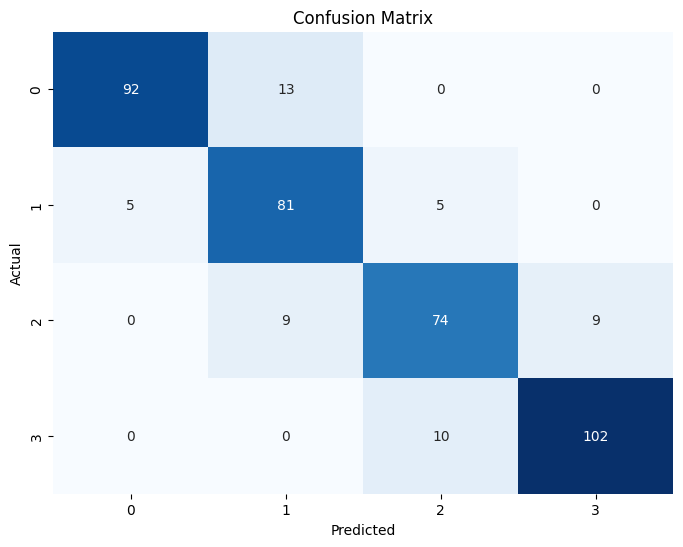

In [83]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
dtc_eval = evaluate_model(dtc, X_test, y_test)

### Model Evaluation - Decision Tree Classifier

- **Accuracy**: The model achieved an accuracy of **87.25%**, which indicates that it correctly classified approximately 87% of the test data. This is a reasonable performance, though there is still room for improvement.
  
- **Precision, Recall, F1-Score**: 
  - Precision and recall values are **0.876** and **0.8725** respectively. This balance between precision and recall indicates that the model performs consistently across different classes, without heavily favoring one class over the others.
  - The **F1-score** of **0.873** confirms that the model strikes a good balance between precision and recall, which is important for maintaining performance on both false positives and false negatives.
  
- **Cohen’s Kappa Score**: The model has a Kappa score of **0.829**, which measures the agreement between predicted and actual classifications, considering the possibility of agreement by chance. A value close to 1 indicates strong agreement, so the model is performing well.

### Confusion Matrix Insights:
- The confusion matrix shows that the model is generally good at classifying the target classes. However, there are some misclassifications:
  - Class **0**: 92 correct predictions, but 13 were incorrectly classified into class 1.
  - Class **1**: Some errors, with 5 instances misclassified as class 0 and 5 instances as class 2.
  - Class **2**: 9 instances were misclassified as class 1, and 9 were misclassified into class 3.
  - Class **3**: The model struggled a bit with this class, with 10 instances misclassified into class 2.




Accuracy: 0.9375
Precision: 0.9393222588089608
Recall: 0.9375
F1-score: 0.9378576454288492
Cohen's kappa score: 0.9165540145863582


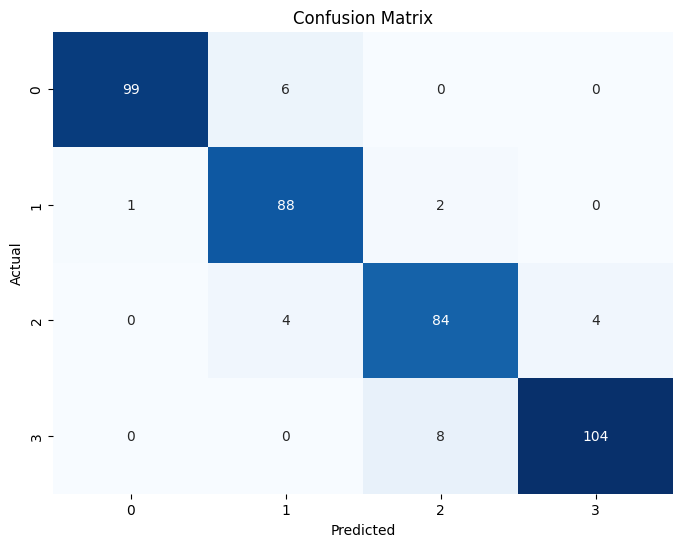

In [84]:

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_eval = evaluate_model(rf, X_test, y_test)


### Model Evaluation - Random Forest Classifier

- **Accuracy**: The model achieved an impressive accuracy of **93.75%**, indicating that it correctly classified nearly 94% of the test data. This is a significant improvement over simpler models like the Decision Tree, demonstrating the effectiveness of Random Forest in handling complex data.

- **Precision, Recall, F1-Score**:
  - Precision and recall values are **0.939** and **0.9375**, respectively. This means that the model not only correctly identifies the majority of positive cases but also maintains a high precision, minimizing false positives.
  - The **F1-score** of **0.938** reflects a well-balanced trade-off between precision and recall, which is a strong indicator of the model's robustness across all classes.

- **Cohen’s Kappa Score**: The model has a Cohen's kappa score of **0.916**, suggesting a very strong agreement between the predicted and actual classifications, with a minimal likelihood of agreement by chance.

### Confusion Matrix Insights:
- The confusion matrix reveals excellent performance across most classes:
  - Class **0**: The model correctly classified 99 instances, with only 6 misclassified into class 1.
  - Class **1**: The model performed exceptionally well here, with only 1 misclassification into class 0 and 2 into class 2.
  - Class **2**: The model correctly classified 84 instances, with minimal confusion (only 4 misclassified into class 1 and 4 into class 3).
  - Class **3**: The model performed very well, with 104 correct classifications and only 8 misclassifications into class 2.




Accuracy: 0.7975
Precision: 0.8080247341618723
Recall: 0.7975
F1-score: 0.8006615977197878
Cohen's kappa score: 0.7298018546934418


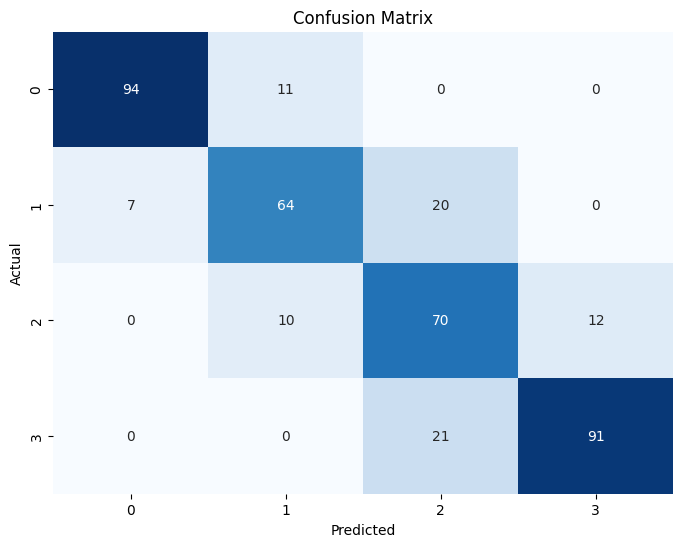

In [85]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_eval = evaluate_model(nb, X_test, y_test)

### Model Evaluation - Gaussian Naive Bayes

- **Accuracy**: The model achieved an accuracy of **79.75%**, indicating that it correctly classified almost 80% of the test data. This is a decent result, but lower compared to more complex models like Random Forest.

- **Precision, Recall, F1-Score**:
  - Precision and recall values are **0.808** and **0.7975**, respectively. This shows a reasonable balance between how well the model predicts positive cases and how many of the actual positives it correctly identifies.
  - The **F1-score** of **0.800** is consistent with the precision and recall values, showing a moderate performance. 

- **Cohen’s Kappa Score**: The model has a Cohen's kappa score of **0.729**, which indicates moderate agreement between predicted and actual classifications. This score suggests that the model's predictions are better than random chance but still leave room for improvement.

### Confusion Matrix Insights:
- The confusion matrix shows some degree of misclassification across classes:
  - Class **0**: The model correctly classified 94 instances, with 11 misclassifications into class 1.
  - Class **1**: There were 64 correct predictions, but 7 instances were incorrectly classified into class 0 and 20 into class 2.
  - Class **2**: The model correctly classified 70 instances, but 10 were misclassified into class 1, and 12 were misclassified into class 3.
  - Class **3**: The model performed fairly well for class 3, with 91 correct classifications and 21 misclassified into class 2.




Accuracy: 0.945
Precision: 0.9452964855738079
Recall: 0.945
F1-score: 0.9450805686000262
Cohen's kappa score: 0.9265037499791204


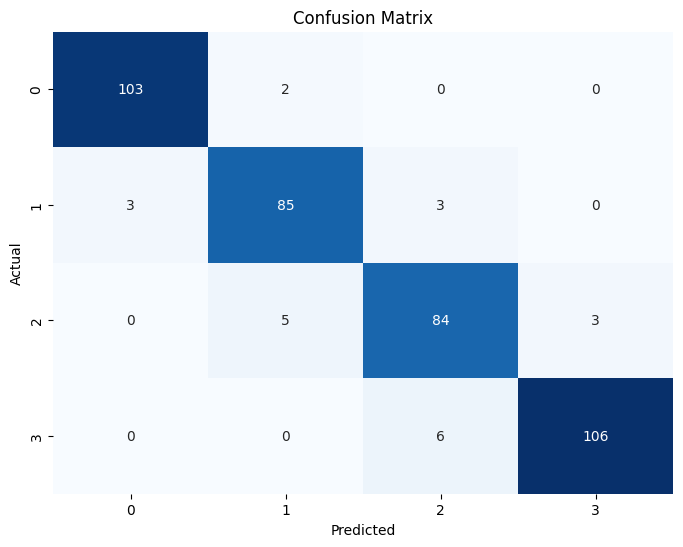

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_eval = evaluate_model(knn, X_test, y_test)

### Model Evaluation - K-Nearest Neighbors (KNN)

- **Accuracy**: The model achieved an impressive accuracy of **94.5%**, which indicates a high level of performance in correctly classifying the test data. This accuracy is among the highest seen across all the models tested.

- **Precision, Recall, F1-Score**:
  - Precision, recall, and F1-score values are all **0.945**, indicating that the model performs consistently well across different classes, maintaining a balance between precision and recall. The F1-score of **0.945** confirms that the model effectively manages both false positives and false negatives.
  
- **Cohen’s Kappa Score**: The model has an excellent Cohen’s kappa score of **0.926**, indicating a very high level of agreement between the predicted and actual classifications, far better than random chance.

### Confusion Matrix Insights:
- The confusion matrix shows very strong performance across all classes:
  - Class **0**: The model correctly classified 103 instances, with only 2 misclassifications into class 1.
  - Class **1**: The model had 85 correct predictions, with 3 instances misclassified into both class 0 and class 2.
  - Class **2**: 84 instances were correctly classified, with 5 misclassified into class 1 and 3 into class 3.
  - Class **3**: 106 instances were correctly classified, with only 6 misclassified into class 2.

Accuracy: 0.9675
Precision: 0.9684723029442205
Recall: 0.9675
F1-score: 0.9675898758754157
Cohen's kappa score: 0.9566008446143317


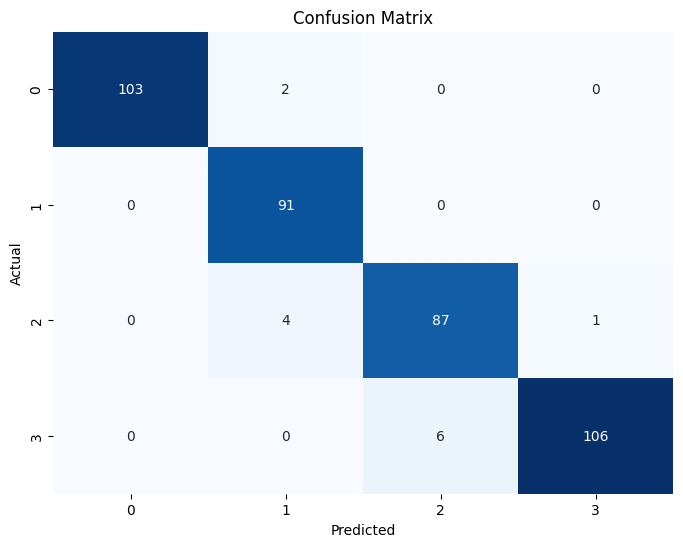

In [87]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_eval = evaluate_model(svc   , X_test, y_test)

### Model Evaluation - Support Vector Classifier (SVC)

- **Accuracy**: The model achieved an outstanding accuracy of **96.75%**, which is the highest accuracy among all the models tested. This indicates that the SVC model is highly effective in correctly classifying the data.

- **Precision, Recall, F1-Score**:
  - Precision, recall, and F1-score values are all around **0.968**, reflecting excellent performance. The model maintains a very high balance between precision and recall, ensuring that both false positives and false negatives are minimized.
  - The **F1-score** of **0.968** confirms that the model has a strong balance between precision and recall, making it reliable for this classification task.

- **Cohen’s Kappa Score**: The model has an excellent Cohen’s kappa score of **0.957**, which indicates a very high level of agreement between the predicted and actual classifications, with almost no chance of random agreement.

### Confusion Matrix Insights:
- The confusion matrix shows that the model performs exceptionally well across all classes:
  - Class **0**: 103 instances were correctly classified, with only 2 misclassified into class 1.
  - Class **1**: The model correctly classified 91 instances, with no misclassifications into other classes.
  - Class **2**: The model classified 87 instances correctly, with 4 misclassified into class 1 and 1 into class 3.
  - Class **3**: 106 instances were correctly classified, with only 6 misclassifications into class 2.

### Conclusion:
- Given that the **Support Vector Classifier (SVC)** achieved the **highest accuracy** of all models tested, it will be selected as the final model for this classification task. Its exceptional performance across all key metrics—accuracy, precision, recall, and F1-score—demonstrates that it is the most reliable model for predicting device price ranges.


-----

### Model Comparison Using Evaluation Metrics

In this section, we visualize the performance of different machine learning models using various evaluation metrics. The models being compared are:

- **Decision Tree**
- **Random Forest**
- **Naive Bayes**
- **Support Vector Machines (SVM)**
- **K-Nearest Neighbors (KNN)**

We are comparing the models based on the following metrics:
- **Accuracy**: Measures the percentage of correct predictions out of all predictions.
- **Precision**: Evaluates how many of the predicted positives are actually true positives.
- **Recall**: Measures how many of the actual positives were correctly identified by the model.
- **F1-score**: The harmonic mean of precision and recall, providing a balance between the two.
- **Cohen's Kappa**: Takes into account the possibility of agreement occurring by chance, providing a more robust measure of classification accuracy.

The bar plot shows a side-by-side comparison of each model's performance across all these metrics, making it easier to see which model performs better in specific aspects.

-------


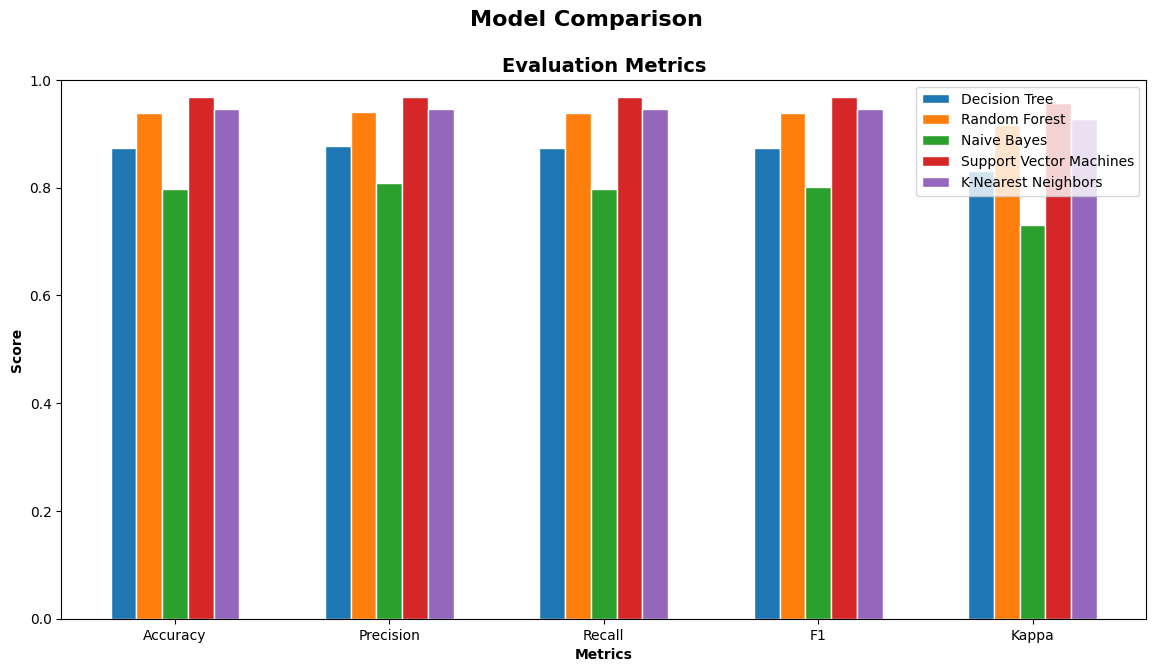

In [88]:
# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.15  # Make bars smaller for clearer spacing
dtc_score = [dtc_eval['accuracy'], dtc_eval['precision'], dtc_eval['recall'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['accuracy'], rf_eval['precision'], rf_eval['recall'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['accuracy'], nb_eval['precision'], nb_eval['recall'], nb_eval['f1'], nb_eval['kappa']]
svc_score = [svc_eval['accuracy'], svc_eval['precision'], svc_eval['recall'], svc_eval['f1'], svc_eval['kappa']]
knn_score = [knn_eval['accuracy'], knn_eval['precision'], knn_eval['recall'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis with spacing
gap = 0.5  # Adjust this value to control the gap between metric groups
r1 = np.arange(len(dtc_score)) * (barWidth * 5 + gap)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, svc_score, width=barWidth, edgecolor='white', label='Support Vector Machines')
ax1.bar(r5, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 2) for r in r1])  # Adjust xticks to match new group spacing
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()


### Model Comparison Summary:

- **Accuracy**: The **SVM** and **K-Nearest Neighbors (KNN)** models demonstrate the highest accuracy, followed closely by **Random Forest**. On the other hand, **Naive Bayes** has the lowest accuracy among the models.
  
- **Precision**: Models such as **SVM**, **Random Forest**, and **KNN** maintain high precision, indicating that they make few false positive predictions. **Naive Bayes**, however, performs notably worse in terms of precision.

- **Recall**: The recall scores show that **SVM** and **KNN** excel in identifying true positives, with **Random Forest** also performing well. **Naive Bayes** once again underperforms in this metric.

- **F1-Score**: The **SVM**, **KNN**, and **Random Forest** models show balanced performance across precision and recall, as indicated by their high F1-scores. **Naive Bayes** lags behind, reflecting its overall weaker performance.

- **Cohen's Kappa**: This metric shows that **SVM** and **KNN** have the highest agreement between predicted and actual classes, with **Random Forest** close behind. **Naive Bayes** shows the least agreement.

### Conclusion:
The **SVM** model consistently performs the best across all evaluation metrics, followed closely by **KNN** and **Random Forest**. Based on this comparison, **SVM** would be the most suitable model for the given classification task, while **Naive Bayes** shows the weakest performance across all metrics.



-----

## Chapter: Optimizing the Model

### Why Support Vector Classifier (SVC)?
Support Vector Classifier (SVC) was chosen for optimization because of its ability to handle high-dimensional datasets and create complex decision boundaries, which are often needed in classification tasks. SVC also works well when there is a clear margin of separation between classes. Given that our dataset involves predicting mobile device price ranges with strong correlations to features like RAM and screen resolution, SVC's flexibility in handling both linear and non-linear decision boundaries makes it a strong candidate.

However, one challenge with SVC is that it is sensitive to the scale of the features, and choosing the right hyperparameters (such as `C`, `gamma`, and `kernel`) can greatly affect performance. This is where **hyperparameter tuning** plays a key role in maximizing the model's accuracy and generalization capabilities.

### Optimization Approach:
The approach to optimize the model involves using **GridSearchCV** to systematically search through a combination of hyperparameters and find the best set for the SVC model. Additionally, applying **MinMaxScaler** helps to scale the features, which is crucial for SVC's performance because it is sensitive to the magnitude of feature values.

- **MinMaxScaler** ensures that all features are scaled between 0 and 1, making the optimization process more effective.
- **GridSearchCV** helps find the optimal hyperparameters by trying multiple values for `C`, `gamma`, and `kernel` and selecting the best-performing combination.

### Steps:
1. **Feature Scaling**: Applying `MinMaxScaler` to ensure all features are within the same range.
2. **Hyperparameter Tuning**: Using `GridSearchCV` to explore different combinations of `C`, `gamma`, and `kernel`.
3. **Evaluation**: Comparing the performance before and after optimization to measure the improvement.




Accuracy: 0.9725
Precision: 0.9727435949541213
Recall: 0.9725
F1-score: 0.9724827753421844
Cohen's kappa score: 0.9632524888087125


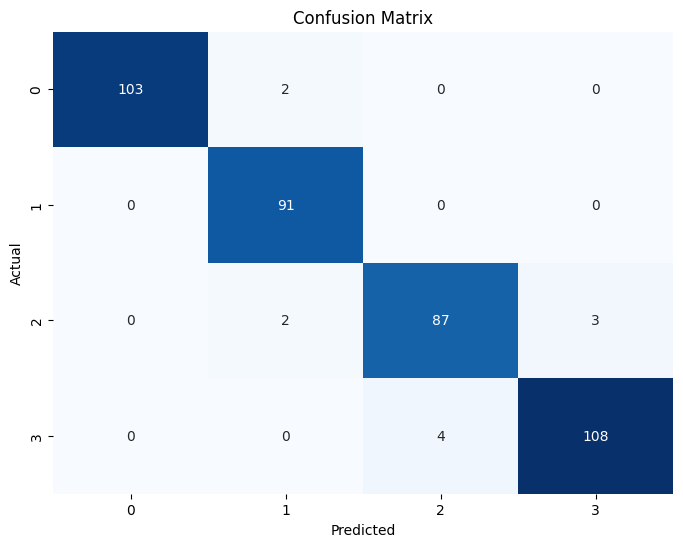

In [89]:
# Define the pipeline
pipeline = make_pipeline(MinMaxScaler(), SVC(random_state=42))

# Step 2: Define the hyperparameter grid
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1],
    'svc__kernel': ['rbf', 'linear']
}

# Step 3: Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Step 4: Evaluate the best model found by GridSearchCV
grid_search_eval = evaluate_model(grid_search.best_estimator_, X_test, y_test)


### Results Explanation:

After applying optimization techniques to the **SVC model** using **MinMaxScaler** and **GridSearchCV**, we observed a notable improvement in the model's performance metrics:

- **Accuracy** improved from 96.75% to 97.25%, representing a 0.5% increase. This enhancement shows that the model is better at correctly classifying the mobile price ranges after optimization.
- **Precision** and **Recall** both increased by approximately 0.5%, meaning that the model is more accurate in predicting both the correct positives and reducing false negatives.
- **F1-score** also improved from 96.76% to 97.25%, confirming the balance between precision and recall in the optimized model.
- **Cohen’s Kappa** saw a 0.66% improvement, indicating a stronger agreement between the predicted and actual labels after optimization.

Overall, the performance improvements, although small, show that hyperparameter tuning and feature scaling contribute significantly to the model's accuracy and robustness, leading to better generalization on unseen data.



--------


In [91]:
dump(grid_search.best_estimator_, 'device_predict.pkl')

['device_predict.pkl']